# TRAIN ALL FILLS, VALIDATION ALL FILLS, ALL DETECTORS

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as pl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/filldata/'
#merged_data = pd.DataFrame()

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("lumiData"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['E(GeV)'])
    print (dataset.shape)
    dataset.columns = ['Timestamp','fill', 'pltzero', 'bcm1f', 'hfoc']
    dataset = dataset.set_index('Timestamp')
    #dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

lumiData_fillRange.csv
(40758, 5)
            fill   pltzero     bcm1f      hfoc
Timestamp                                     
1656979796  7916  0.007553  0.007406  0.006119
1656979815  7916  0.007098  0.006290  0.005698
1656979838  7916  0.006711  0.006589  0.005369
1656979862  7916  0.007862  0.008623  0.006937
1656979885  7916  0.008179  0.008251  0.006847
(40758,)


In [4]:
display(dataset)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


In [5]:
fills = dataset['fill'].unique()
print(np.shape(fills))
fills

(50,)


array([7916, 7920, 7921, 7923, 7960, 7963, 7965, 7966, 7967, 7969, 7978,
       8007, 8016, 8017, 8018, 8019, 8020, 8022, 8023, 8027, 8030, 8033,
       8043, 8046, 8057, 8058, 8059, 8062, 8063, 8067, 8068, 8072, 8073,
       8076, 8078, 8079, 8081, 8083, 8087, 8088, 8091, 8094, 8098, 8099,
       8100, 8102, 8103, 8106, 8108, 8111])

In [6]:
#bad_fills = [7920, 7921, 7963, 7966, 7969, 8016, 8018, 8019, 8020, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8081, 8083, 8094, 8098, 8099, 8100, 8102, 8103, 8106]
bad_fills = [7920, 7921, 7963, 7966, 7969, 8016, 8018, 8019, 8020, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8081, 8083, 8094, 8098, 8099, 8102]

good_fills = [f for f in fills if f not in bad_fills]

In [7]:
np.shape(bad_fills)

(24,)

In [8]:
dataset_train = dataset[dataset.fill.apply(lambda x : x in good_fills)]
dataset_test = dataset[dataset.fill.apply(lambda x : x in bad_fills)]

#dataset_train = dataset[dataset.fill.apply(lambda x : x ==7921)]
#dataset_test = dataset[dataset.fill.apply(lambda x : x ==7916)]

<AxesSubplot:xlabel='Timestamp'>

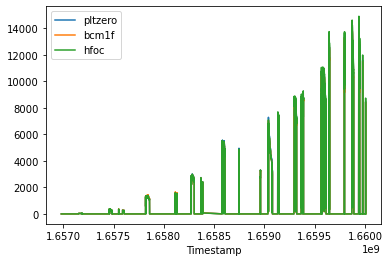

In [9]:
dataset_train.drop(columns=['fill']).plot()

<AxesSubplot:xlabel='Timestamp'>

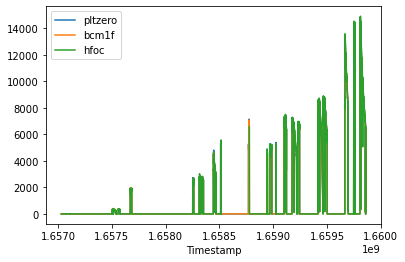

In [10]:
dataset_test.drop(columns=['fill']).plot()

In [11]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
#dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
#dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1657031099,7920,0.000301,0.000309,0.000000
1657031102,7920,0.000292,0.000245,0.000000
1657031125,7920,0.000411,0.000336,0.000000
1657031148,7920,0.000565,0.000345,0.000000
1657031172,7920,0.000540,0.000508,0.000000
...,...,...,...,...
1659859502,8102,6330.852693,6325.928212,6483.756241
1659859525,8102,6334.536898,6330.130013,6488.344285
1659859548,8102,2909.360416,2956.071694,2826.560285


In [12]:
from sklearn import preprocessing

# Normalize data
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
#X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [13]:
X_train

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,0.0,5.238167e-07,5.146756e-07,4.102044e-07
1656979815,0.0,4.922206e-07,4.370904e-07,3.819739e-07
1656979838,0.0,4.654015e-07,4.579056e-07,3.599269e-07
1656979862,0.0,5.452263e-07,5.991969e-07,4.650461e-07
1656979885,0.0,5.671984e-07,5.733339e-07,4.589931e-07
...,...,...,...,...
1660006952,1.0,6.524951e-10,0.000000e+00,0.000000e+00
1660006976,1.0,6.524951e-10,0.000000e+00,0.000000e+00
1660006999,1.0,1.304921e-09,0.000000e+00,0.000000e+00


<AxesSubplot:xlabel='Timestamp'>

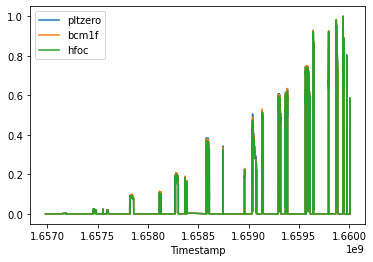

In [14]:
X_train.drop(columns=['fill']).plot()

In [15]:
#Prepocessing, drop channel column
trainX=X_train.drop(columns = ["fill"]) 
#trainX=trainX.drop(trainX.columns[[0]], axis=1)
display(trainX)
testX = X_test.drop(columns = ["fill"]) 
#testX=testX.drop(testX.columns[[0]], axis=1)
display(testX)

,pltzero,bcm1f,hfoc
Timestamp,,,
1656979796,5.238167e-07,5.146756e-07,4.102044e-07
1656979815,4.922206e-07,4.370904e-07,3.819739e-07
1656979838,4.654015e-07,4.579056e-07,3.599269e-07
1656979862,5.452263e-07,5.991969e-07,4.650461e-07
1656979885,5.671984e-07,5.733339e-07,4.589931e-07
...,...,...,...
1660006952,6.524951e-10,0.000000e+00,0.000000e+00
1660006976,6.524951e-10,0.000000e+00,0.000000e+00
1660006999,1.304921e-09,0.000000e+00,0.000000e+00


,pltzero,bcm1f,hfoc
Timestamp,,,
1657031099,2.087873e-08,2.144230e-08,0.000000
1657031102,2.022631e-08,1.702806e-08,0.000000
1657031125,2.849072e-08,2.333515e-08,0.000000
1657031148,3.914749e-08,2.396557e-08,0.000000
1657031172,3.743487e-08,3.531856e-08,0.000000
...,...,...,...
1659859502,4.390318e-01,4.395912e-01,0.434640
1659859525,4.392873e-01,4.398832e-01,0.434948
1659859548,2.017583e-01,2.054186e-01,0.189479


In [16]:
# Defining the Autoencoder network higher batch size
import tensorflow
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

tensorflow.random.set_seed(10)
act_func = 'elu'
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(trainX.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(trainX.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')
model.summary()

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=10
BATCH_SIZE=100  # or actually need bigger batch size? to take more samples for updating model parameters
 

2022-08-29 13:33:24.898258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/thepeg/2.2.3-bb611/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/herwig++/7.2.3-5f56d/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


2022-08-29 13:33:44.792022: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-29 13:33:44.792081: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lxplus748.cern.ch): /proc/driver/nvidia/version does not exist
2022-08-29 13:33:44.793137: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
#Fit the model
history=model.fit(np.array(trainX),np.array(trainX),epochs=100,
                  validation_split=0.20,
                  batch_size=100,shuffle=True,
                  verbose = 1)

Epoch 1/100
156/156 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 2/100
156/156 [==============================] - 0s 1ms/step - loss: 8.3225e-05 - val_loss: 0.0022
Epoch 3/100
156/156 [==============================] - 0s 2ms/step - loss: 6.4311e-05 - val_loss: 0.0018
Epoch 4/100
156/156 [==============================] - 0s 1ms/step - loss: 5.1712e-05 - val_loss: 0.0014
Epoch 5/100
156/156 [==============================] - 0s 1ms/step - loss: 4.0646e-05 - val_loss: 9.7184e-04
Epoch 6/100
156/156 [==============================] - 0s 1ms/step - loss: 3.1664e-05 - val_loss: 6.3851e-04
Epoch 7/100
156/156 [==============================] - 0s 1ms/step - loss: 2.4538e-05 - val_loss: 5.1060e-04
Epoch 8/100
156/156 [==============================] - 0s 1ms/step - loss: 1.9076e-05 - val_loss: 3.3126e-04
Epoch 9/100
156/156 [==============================] - 0s 1ms/step - loss: 1.5266e-05 - val_loss: 2.3575e-04
Epoch 10/100
156/156 [=================

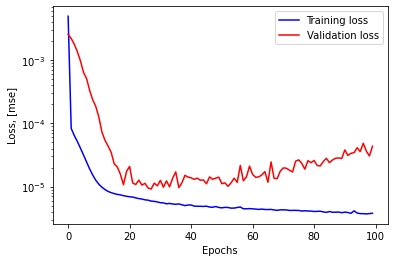

In [18]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()

In [19]:
#Compute RMSE
import sklearn.metrics as metrics
pred = model.predict(trainX)
score1 = np.sqrt(metrics.mean_squared_error(pred,trainX))

pred = model.predict(testX)
score2 = np.sqrt(metrics.mean_squared_error(pred,testX))


print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Test Samples Good Score (RMSE): {score2}")

Insample Good Score (RMSE): 0.0034154349520002314
Test Samples Good Score (RMSE): 0.008336870558447751


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.01, 1000)

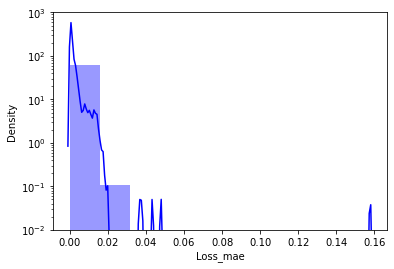

In [20]:
# Distribution of loss function in the training set
import seaborn as sns
X_pred = model.predict(np.array(trainX))
X_pred = pd.DataFrame(X_pred, 
                      columns=trainX.columns)
X_pred.index = trainX.index

scored = pd.DataFrame(index=trainX.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-trainX), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.01, 1000)

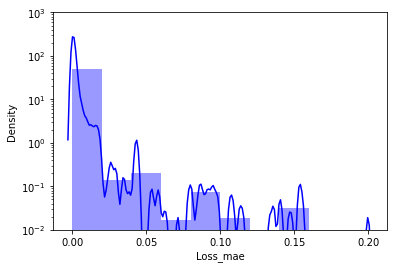

In [21]:
# Distribution of loss function in the test set
import seaborn as sns
X_pred = model.predict(np.array(testX))
X_pred = pd.DataFrame(X_pred, 
                      columns=testX.columns)
X_pred.index = testX.index

scored = pd.DataFrame(index=testX.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-testX), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)

In [22]:
# Setting threshold

X_pred = model.predict(np.array(testX))
X_pred = pd.DataFrame(X_pred, 
                      columns=testX.columns)
X_pred.index = testX.index

scored = pd.DataFrame(index=testX.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-testX), axis = 1)
scored['Threshold'] = 0.02 #sigmoid+batch_size=100
#scored['Threshold'] = 0.00078 #relu+batch_size=50
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
1657031099,0.000318,0.02,False
1657031102,0.000318,0.02,False
1657031125,0.000318,0.02,False
1657031148,0.000318,0.02,False
1657031172,0.000318,0.02,False


In [23]:
# all train data

X_pred_train = model.predict(np.array(trainX))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=trainX.columns)
X_pred_train.index = trainX.index

scored_train = pd.DataFrame(index=trainX.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-trainX), axis = 1)
scored_train['Threshold'] = 0.02 #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])
scored_train.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
1656979796,0.000318,0.02,False
1656979815,0.000318,0.02,False
1656979838,0.000318,0.02,False
1656979862,0.000318,0.02,False
1656979885,0.000318,0.02,False


In [24]:
df = scored.loc[scored['Anomaly'] == True]
df

,Loss_mae,Threshold,Anomaly
Timestamp,,,
1657684434,0.043180,0.02,True
1657684457,0.043457,0.02,True
1657684480,0.043467,0.02,True
1657684504,0.043353,0.02,True
1657684527,0.043294,0.02,True
...,...,...,...
1659806835,0.035747,0.02,True
1659806859,0.054003,0.02,True
1659806882,0.053387,0.02,True


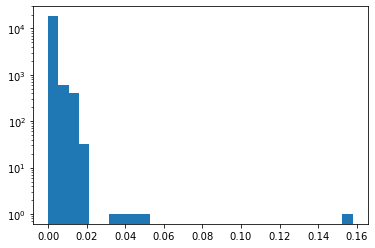

In [25]:
X_predtrain = model.predict(np.array(trainX))
trainMAE = np.mean(np.abs(X_predtrain - trainX), axis=1)
plt.hist(trainMAE, bins=30)
plt.yscale('log')

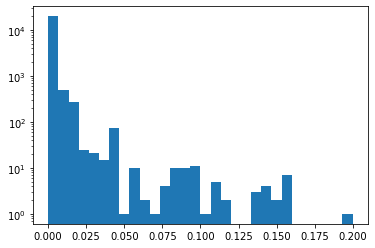

In [26]:
X_pred = model.predict(np.array(testX))
testMAE = np.mean(np.abs(X_pred - testX), axis=1)
plt.hist(testMAE, bins=30)
plt.yscale('log')

In [27]:
threshold = 0.02

In [28]:
anomaly_df = pd.DataFrame(testX)
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']

In [29]:
anomaly_df_train = pd.DataFrame(trainX)
anomaly_df_train['trainMAE'] = trainMAE
anomaly_df_train['Threshold'] = threshold
anomaly_df_train['anomaly'] = anomaly_df_train['trainMAE'] > anomaly_df_train['Threshold']

In [30]:
anomaly_df_train

,pltzero,bcm1f,hfoc,trainMAE,Threshold,anomaly
Timestamp,,,,,,
1656979796,5.238167e-07,5.146756e-07,4.102044e-07,0.000318,0.02,False
1656979815,4.922206e-07,4.370904e-07,3.819739e-07,0.000318,0.02,False
1656979838,4.654015e-07,4.579056e-07,3.599269e-07,0.000318,0.02,False
1656979862,5.452263e-07,5.991969e-07,4.650461e-07,0.000318,0.02,False
1656979885,5.671984e-07,5.733339e-07,4.589931e-07,0.000318,0.02,False
...,...,...,...,...,...,...
1660006952,6.524951e-10,0.000000e+00,0.000000e+00,0.000318,0.02,False
1660006976,6.524951e-10,0.000000e+00,0.000000e+00,0.000318,0.02,False
1660006999,1.304921e-09,0.000000e+00,0.000000e+00,0.000318,0.02,False


In [31]:
anomalies_train = anomaly_df_train.loc[anomaly_df_train['anomaly'] == True]

In [32]:
anomalies_train

,pltzero,bcm1f,hfoc,trainMAE,Threshold,anomaly
Timestamp,,,,,,
1658589006,0.357730,0.353373,0.258355,0.037745,0.02,True
1658595415,0.370323,0.365579,0.000000,0.157859,0.02,True
1659386831,0.601553,0.600578,0.490867,0.043318,0.02,True
1659937202,0.035883,0.165302,0.177215,0.047832,0.02,True
1659940559,0.973752,0.974487,0.898494,0.036542,0.02,True


<AxesSubplot:xlabel='Timestamp'>

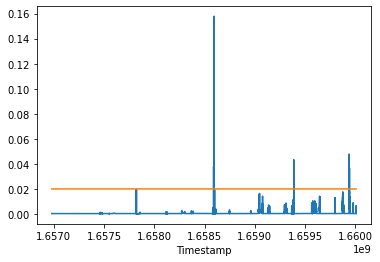

In [33]:
#Plot testMAE vs max_trainMAE
anomaly_df_train['trainMAE'].plot()
anomaly_df_train['Threshold'].plot()

In [34]:
anomaly_df 

,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,
1657031099,2.087873e-08,2.144230e-08,0.000000,0.000318,0.02,False
1657031102,2.022631e-08,1.702806e-08,0.000000,0.000318,0.02,False
1657031125,2.849072e-08,2.333515e-08,0.000000,0.000318,0.02,False
1657031148,3.914749e-08,2.396557e-08,0.000000,0.000318,0.02,False
1657031172,3.743487e-08,3.531856e-08,0.000000,0.000318,0.02,False
...,...,...,...,...,...,...
1659859502,4.390318e-01,4.395912e-01,0.434640,0.003564,0.02,False
1659859525,4.392873e-01,4.398832e-01,0.434948,0.003580,0.02,False
1659859548,2.017583e-01,2.054186e-01,0.189479,0.002550,0.02,False


In [35]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies

,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,
1657684434,0.000904,0.132082,0.125822,0.043180,0.02,True
1657684457,0.000000,0.131932,0.125794,0.043457,0.02,True
1657684480,0.000000,0.131808,0.125879,0.043467,0.02,True
1657684504,0.000000,0.131422,0.125571,0.043353,0.02,True
1657684527,0.000000,0.131176,0.125428,0.043294,0.02,True
...,...,...,...,...,...,...
1659806835,0.564592,0.656126,0.655248,0.035747,0.02,True
1659806859,0.563433,0.708311,0.704048,0.054003,0.02,True
1659806882,0.564602,0.707740,0.703599,0.053387,0.02,True


<AxesSubplot:xlabel='Timestamp'>

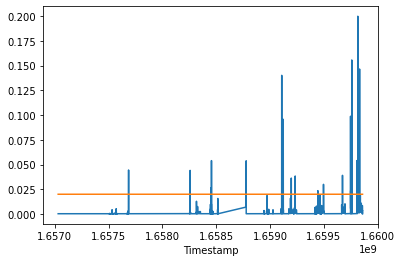

In [36]:
#Plot testMAE vs max_trainMAE
anomaly_df['testMAE'].plot()
anomaly_df['Threshold'].plot()

<AxesSubplot:xlabel='Timestamp'>

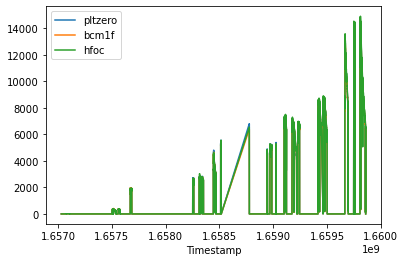

In [37]:
dataset_test.drop(columns=['fill']).plot()

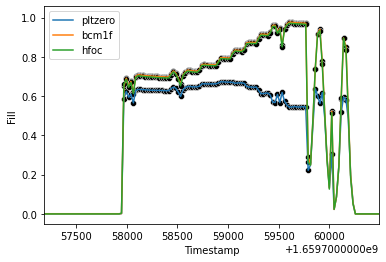

In [38]:
ax=anomaly_df.drop(columns=[ "testMAE","Threshold"]).plot(xlim=(1659757185,1659760489))    #8062
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Auto1Anomalydetectionfill_8099.png")

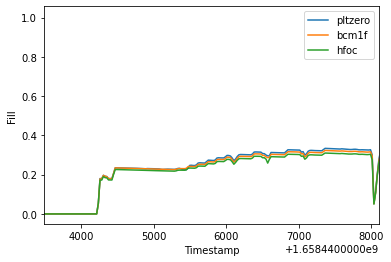

In [39]:
ax=anomaly_df.drop(columns=[ "testMAE","Threshold"]).plot(xlim=(1658443493,1658448107))    #8027
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Auto1Anomalydetectionfill_8027.png")


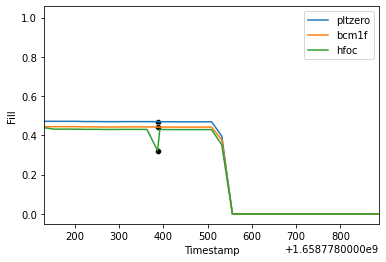

In [40]:
ax=anomaly_df.drop(columns=[ "testMAE","Threshold"]).plot(xlim=(1658778131,1658778887))    #8046
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Auto1Anomalydetectionfill_8046.png")

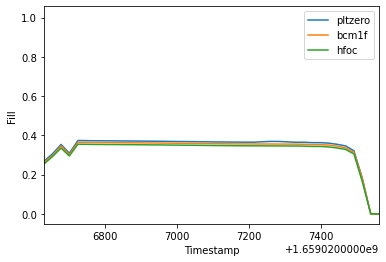

In [41]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659026630,1659027563))    #8062
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Auto1Anomalydetectionfill_8062.png")


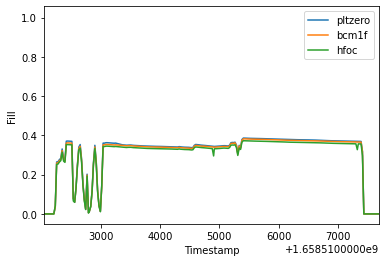

In [42]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658512046,1658517696))    #8062
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8030.png")

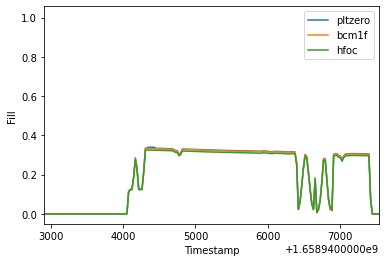

In [43]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658942902,1658947546))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8057.png")

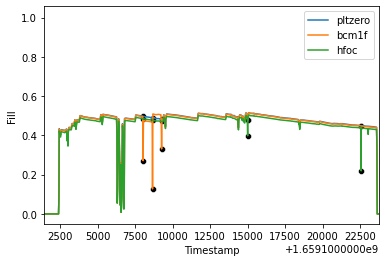

In [44]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659101417,1659123763))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8067.png")

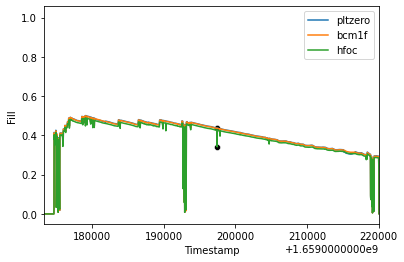

In [45]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659173359,1659220055))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8072.png")

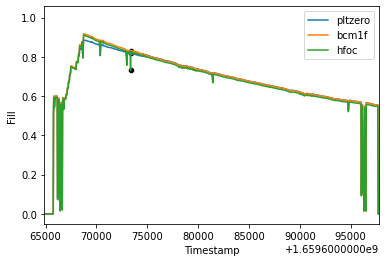

In [46]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659664864,1659697777))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8094.png")

<AxesSubplot:xlabel='Timestamp'>

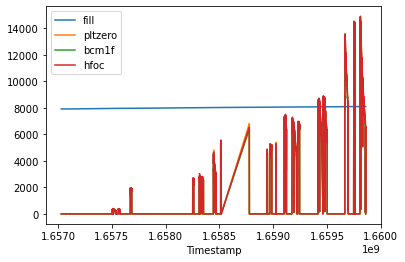

In [47]:
dataset_test.plot()

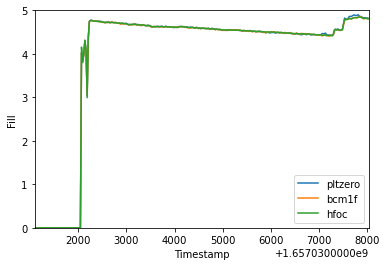

In [48]:
ax=dataset_test.drop(columns=["fill"]).plot(xlim=(1657031099,1657038040),ylim=(0,5))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_7920.png")

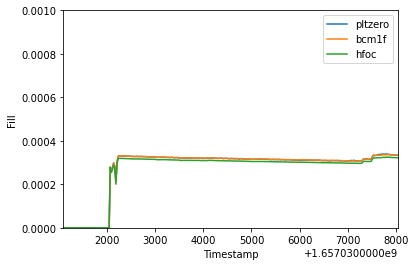

In [49]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1657031099,1657038040),ylim=(0,0.001))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_7921.png")

In [50]:
dp = dataset_test.loc[dataset_test['fill'] == 7920]
dp.reset_index()
#dp.iloc[1850,:]
dp.iloc[0:300,:]
#timestamps = dp['Timestamp'].unique()

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1657031099,7920,0.000301,0.000309,0.000000
1657031102,7920,0.000292,0.000245,0.000000
1657031125,7920,0.000411,0.000336,0.000000
1657031148,7920,0.000565,0.000345,0.000000
1657031172,7920,0.000540,0.000508,0.000000
...,...,...,...,...
1657037947,7920,4.830333,4.812314,4.818511
1657037970,7920,4.824923,4.816524,4.817602
1657037993,7920,4.826060,4.811246,4.810455


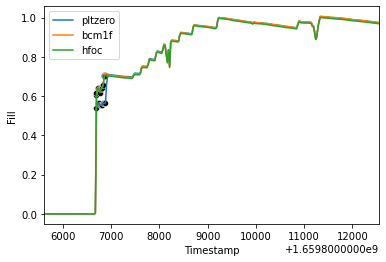

In [51]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659805611,1659812553))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8102.png")

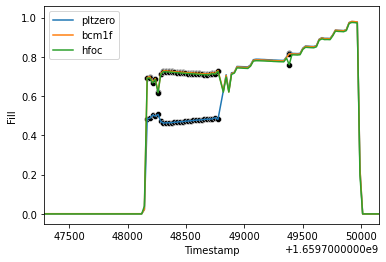

In [52]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659747286,1659750153))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8098.png")

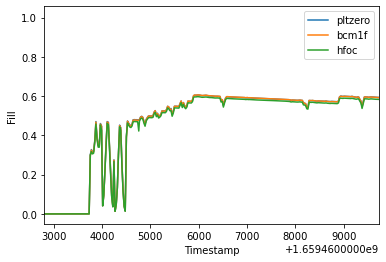

In [53]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659462806,1659469727))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8083.png")

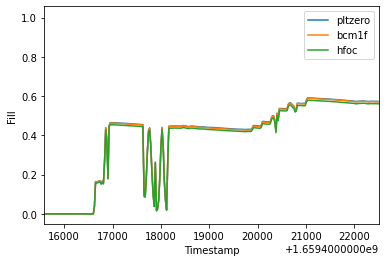

In [54]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659415586,1659422509))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8081.png")

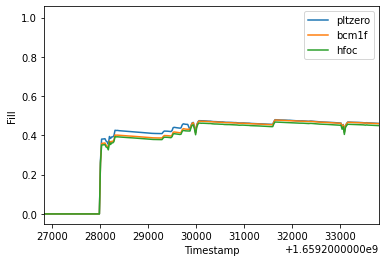

In [55]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659226838,1659233815))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8073.png")

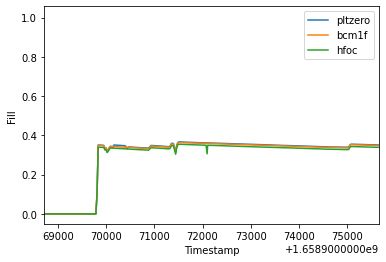

In [56]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658968714,1658975661))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8059.png")

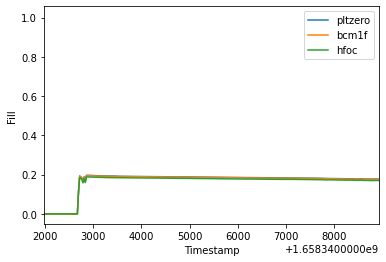

In [57]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658341988,1658348923))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8020.png")

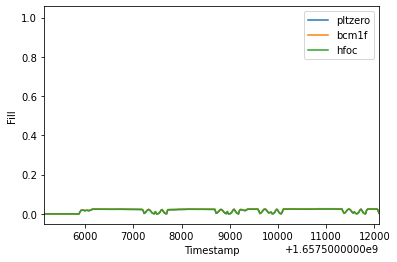

In [58]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1657505150,1657512096))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_7963.png")

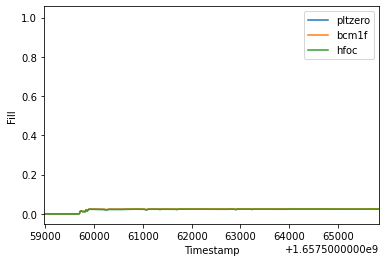

In [59]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1657558975,1657565841))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_7966.png")

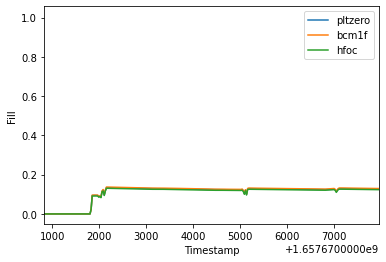

In [60]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1657670824,1657677954))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_7969.png")

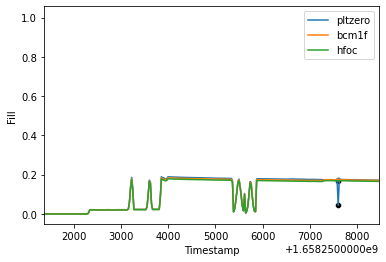

In [61]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658251377,1658258459))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8016.png")

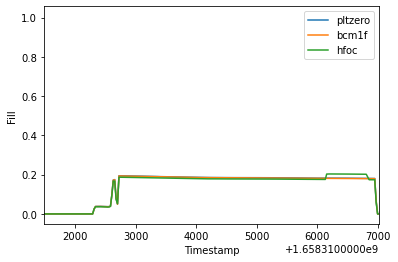

In [62]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658311493,1658317015))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8018.png")

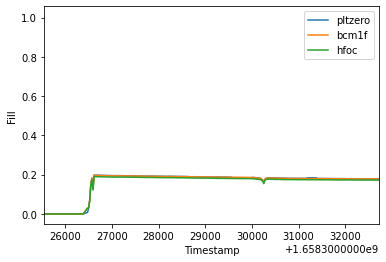

In [63]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658325548,1658332721))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8019.png")

In [64]:
dp = dataset_test.loc[dataset_test['fill'] == 8027]
dp.reset_index()
#dp.iloc[1850,:]
dp.iloc[0:300,:]
#timestamps = dp['Timestamp'].unique()

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1658443493,8027,1.798193,2.840992,0.000000
1658443498,8027,1.796960,2.830684,0.000000
1658443522,8027,1.795314,2.841768,0.000000
1658443545,8027,1.810321,2.851678,0.000000
1658443568,8027,1.805955,2.843100,0.000000
...,...,...,...,...
1658450398,8027,4250.872047,4214.022670,4198.364432
1658450421,8027,4243.822495,4209.257863,4194.566454
1658450445,8027,4241.758461,4208.221695,4193.206545


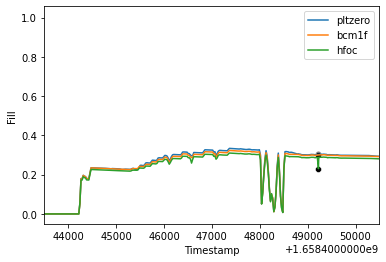

In [65]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1658443493,1658450491))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"2Anomalydetectionfill_8094.png")

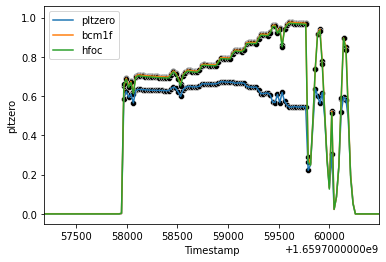

In [66]:
ax=anomaly_df.drop(columns=["testMAE","Threshold"]).plot(xlim=(1659757185,1659760489))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
plt.savefig(f"Auto2Anomalydetectionfill_.png")

In [67]:
anomalies_train

,pltzero,bcm1f,hfoc,trainMAE,Threshold,anomaly
Timestamp,,,,,,
1658589006,0.357730,0.353373,0.258355,0.037745,0.02,True
1658595415,0.370323,0.365579,0.000000,0.157859,0.02,True
1659386831,0.601553,0.600578,0.490867,0.043318,0.02,True
1659937202,0.035883,0.165302,0.177215,0.047832,0.02,True
1659940559,0.973752,0.974487,0.898494,0.036542,0.02,True


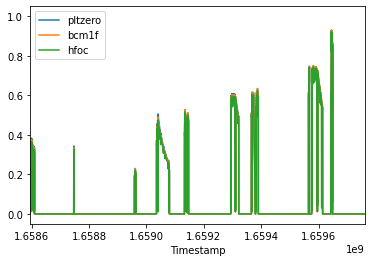

In [68]:
ax=anomaly_df_train.drop(columns=["trainMAE","Threshold"]).plot(xlim=(1658595415,1659760489))    #tryout

In [69]:
anomalies_train    

,pltzero,bcm1f,hfoc,trainMAE,Threshold,anomaly
Timestamp,,,,,,
1658589006,0.357730,0.353373,0.258355,0.037745,0.02,True
1658595415,0.370323,0.365579,0.000000,0.157859,0.02,True
1659386831,0.601553,0.600578,0.490867,0.043318,0.02,True
1659937202,0.035883,0.165302,0.177215,0.047832,0.02,True
1659940559,0.973752,0.974487,0.898494,0.036542,0.02,True


<AxesSubplot:xlabel='Timestamp', ylabel='pltzero'>

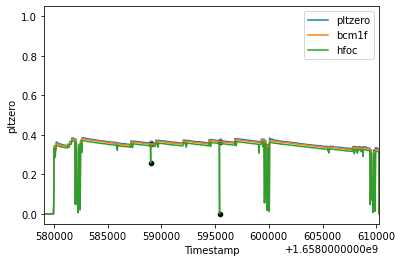

In [70]:
ax=anomaly_df_train.drop(columns=["trainMAE","Threshold"]).plot(xlim=(1658579098,1658610255))    #tryout
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
#plt.savefig(f"Auto2Anomalydetectionfill_.png")   8033

<AxesSubplot:xlabel='Timestamp', ylabel='pltzero'>

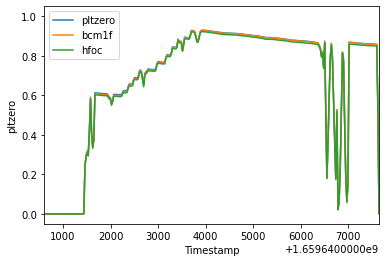

In [71]:
ax=anomaly_df_train.drop(columns=["trainMAE","Threshold"]).plot(xlim=(1659640602,1659647645))    #tryout
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
#plt.savefig(f"Auto2Anomalydetectionfill_.png")

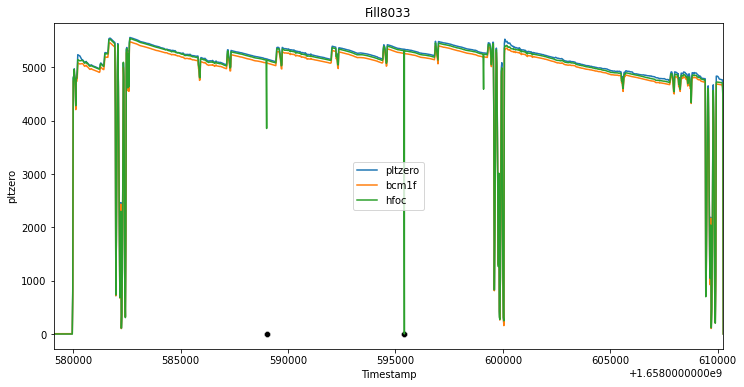

In [72]:
df = dataset.loc[dataset['fill'] == 8033]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
plt.title(f"Fill{8033}")
plt.xlim(1658579098,1658610255)
#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()

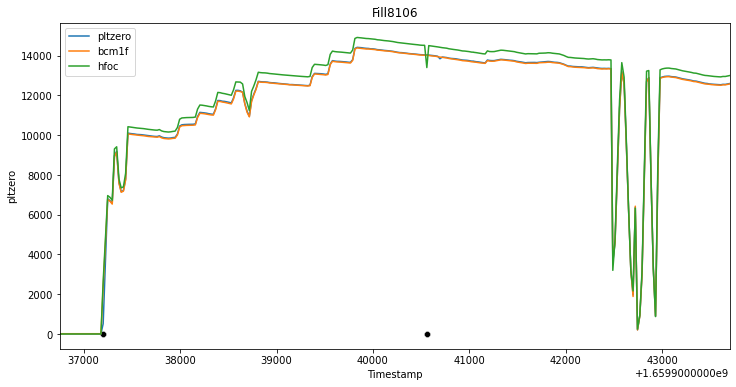

In [73]:
df = dataset.loc[dataset['fill'] == 8106]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8106}")
plt.xlim(1659936755,1659943700)
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()

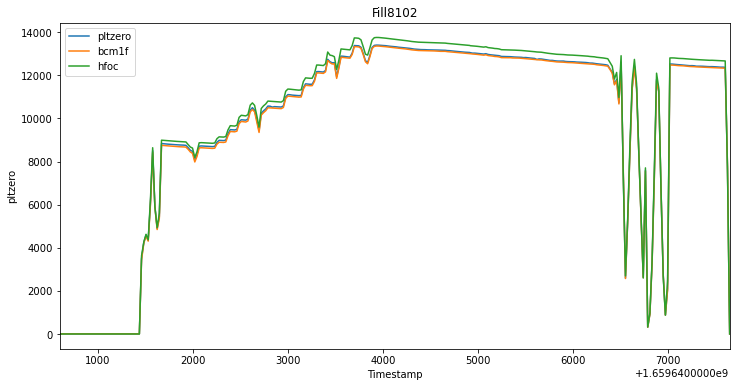

In [74]:
df = dataset.loc[dataset['fill'] == 8091]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8102}")
plt.xlim(1659640602,1659647645)
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()

<AxesSubplot:xlabel='Timestamp', ylabel='pltzero'>

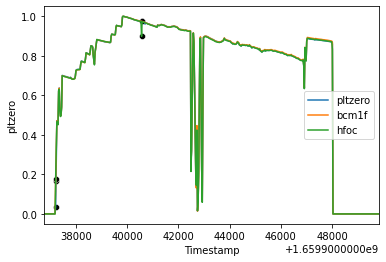

In [75]:
ax=anomaly_df_train.drop(columns=["trainMAE","Threshold"]).plot(xlim=(1659936755,1659949835))    #tryout
sns.scatterplot(data=anomalies_train, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies_train, x="Timestamp", y="hfoc",color="black")
#plt.savefig(f"Auto2Anomalydetectionfill_.png")   8033

,pltzero,bcm1f,hfoc
Timestamp,,,
1659946568,11427.167057,11444.917651,11811.684791
1659946592,11385.516251,11402.156456,11768.131577
1659946615,11366.627925,11380.527803,11747.795937
1659946638,11345.914342,11356.798495,11723.326369
1659946662,11351.410619,11363.099486,11729.809008
1659946685,11337.674809,11348.952529,11712.557455


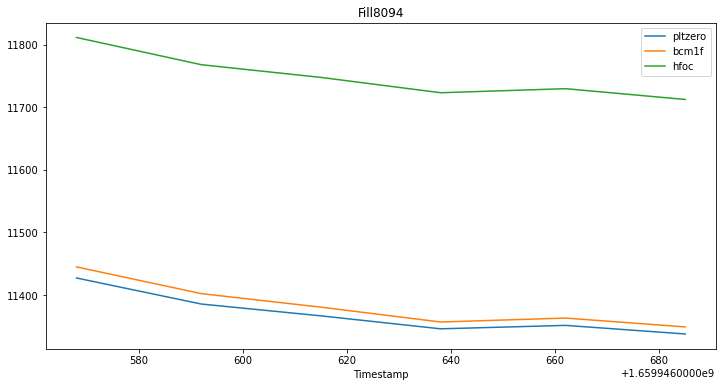

In [76]:
df = dataset.loc[dataset['fill'] == 8106]
df = df.drop(df.columns[[0]], axis=1)
df =df.iloc[422:428, :]
display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8094}")
plt.savefig(f"fill_{8094}.png")
plt.show()
plt.close()

In [77]:
dp = dataset_train.loc[dataset_train['fill'] == 8106]
dp.reset_index()
#dp.iloc[1850,:]
#dp.iloc[0:300,:]
#timestamps = dp['Timestamp'].unique()

,Timestamp,fill,pltzero,bcm1f,hfoc
0,1659936755,8106,8.206181,13.120570,0.0
1,1659936764,8106,8.201067,13.124431,0.0
2,1659936787,8106,8.184852,13.068404,0.0
3,1659936811,8106,8.153273,13.046121,0.0
4,1659936834,8106,8.129856,13.042189,0.0
...,...,...,...,...,...
544,1659949742,8106,0.000009,0.000000,0.0
545,1659949765,8106,0.000000,0.000000,0.0
546,1659949788,8106,0.000019,0.000000,0.0
547,1659949812,8106,0.000000,0.000000,0.0


In [78]:
dataset_train

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


In [86]:
df = dataset.loc[dataset['fill'] == 8098]
df = df.drop(df.columns[[0]], axis=1)
display(df)

,pltzero,bcm1f,hfoc
Timestamp,,,
1659747286,10.177141,16.178782,0.0
1659747308,10.158441,16.120295,0.0
1659747331,10.148677,16.094748,0.0
1659747354,10.135297,16.099087,0.0
1659747377,10.136685,16.108401,0.0
...,...,...,...
1659750060,0.000038,0.000000,0.0
1659750083,0.000000,0.000000,0.0
1659750107,0.000009,0.000000,0.0


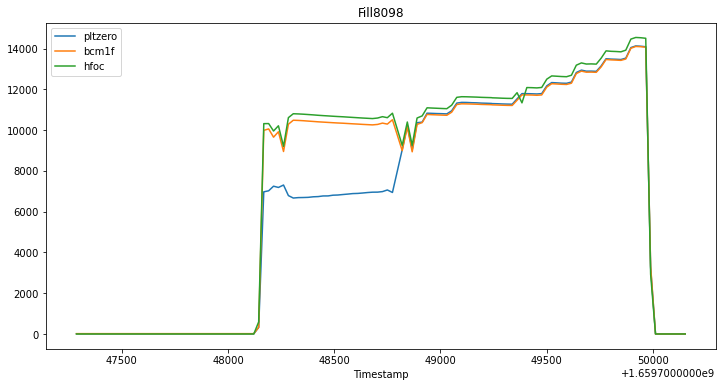

In [90]:
df = dataset.loc[dataset['fill'] == 8098]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8098}")
#plt.xlim(1659936755,1659943700)
#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()

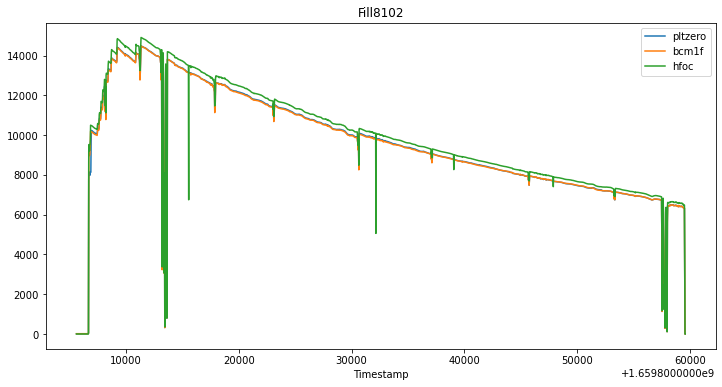

In [91]:
df = dataset.loc[dataset['fill'] == 8102]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8102}")
#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()

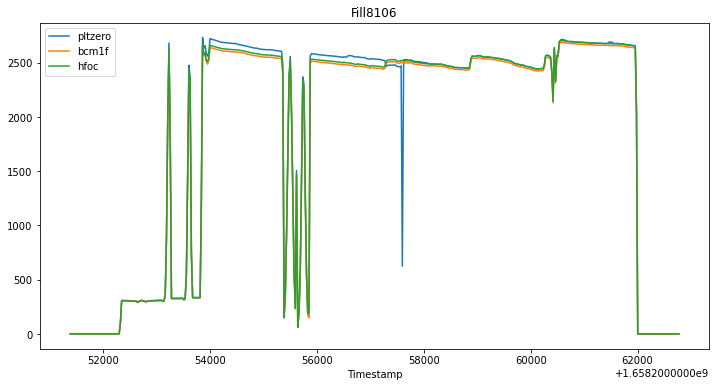

In [92]:
df = dataset.loc[dataset['fill'] == 8016]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8106}")

#plt.savefig(f"fill_{name}.png")
plt.show()
plt.close()